# LETS GROW MORE DATA SCIENCE INTERN MARCH 2023

# Beginner Level Task: 


## Task 2: Stock Market Prediction And Forecasting Using Stacked LSTM

**The objective of this Data science project is to analyse a stock dataset and predict the price and time trajectory for that particular stock.**

**Dataset Link:** https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('Stock_data.csv')

In [3]:
df.shape

(2035, 8)

In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [10]:
df.reset_index(inplace=True)

In [11]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# Visualizations

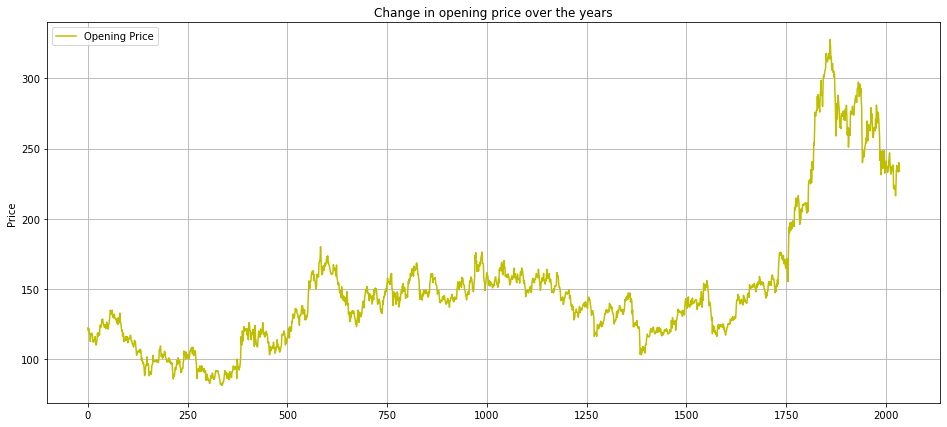

In [12]:
plt.figure(figsize=(10,6))
df['Open'].plot(kind='line',figsize=(16,7),color='y',label="Opening Price")

plt.ylabel("Price")
plt.legend(loc="upper left")
plt.title("Change in opening price over the years")
plt.grid()

### *Conclusion:*

**A gradual increment in opening price is seen for first 5 years and then a quick increment is seen in just next year.**

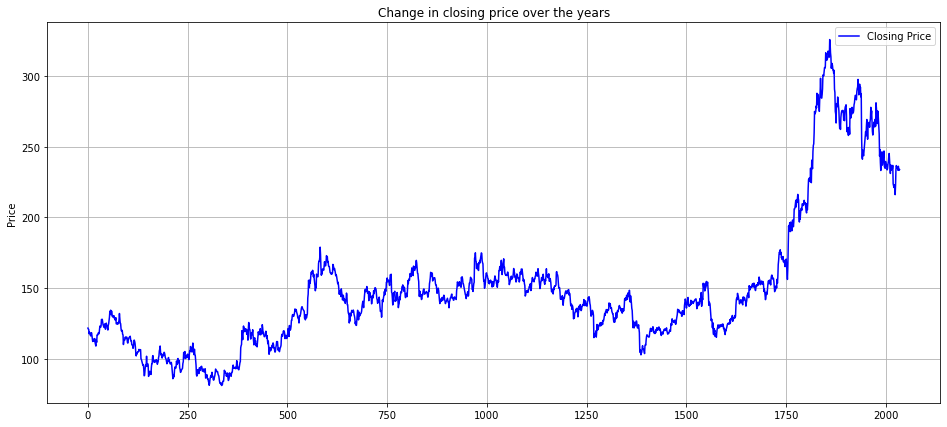

In [13]:
plt.figure(figsize=(10,6))
df['Close'].plot(kind='line',figsize=(16,7),color='blue',label="Closing Price")

plt.ylabel("Price")
plt.legend(loc="upper right")
plt.title("Change in closing price over the years")
plt.grid()

### *Conclusion:*
**A gradual increment in closing price is seen for first 5 years and then a quick increment is seen in just next year.**

<AxesSubplot:ylabel='Turnover (Lacs)'>

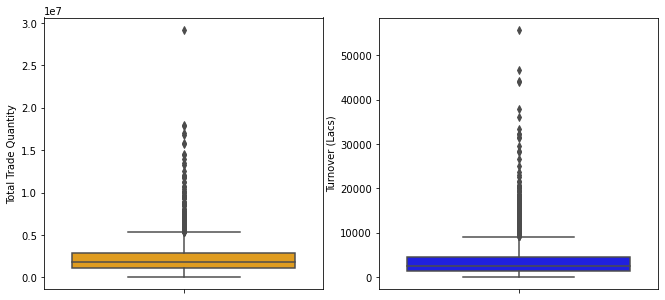

In [14]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,y='Total Trade Quantity',color='orange')
plt.subplot(1,2,2)
sns.boxplot(data=df,y='Turnover (Lacs)',color='blue')

# Model

In [15]:
df1 = df['Close']

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [17]:
training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size


train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1), :1]

In [18]:
training_size, test_size

(1424, 611)

In [19]:
#convert an array of values into a dataset matrix
def datasetCrtd(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return np.array(dataX), np.array(dataY)

In [20]:
time_step = 100
X_train, y_train = datasetCrtd(train_data, time_step)
X_test, ytest = datasetCrtd(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [22]:
#Reshape input which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Building Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [24]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 9s 216ms/step - loss: 0.0112 - val_loss: 0.0013
Epoch 2/60
19/19 [==============================] - 4s 188ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 3/60
19/19 [==============================] - 3s 168ms/step - loss: 9.9770e-04 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 3s 168ms/step - loss: 8.9110e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 3s 153ms/step - loss: 8.3541e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 3s 158ms/step - loss: 8.2571e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 3s 170ms/step - loss: 7.9569e-04 - val_loss: 0.0011
Epoch 8/60
19/19 [==============================] - 4s 189ms/step - loss: 7.7144e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 3s 148ms/step - loss: 7.6889e-04 - val_loss: 9.7495e-04
Epoch 10/60
19/19 [==============================] - 3s 151ms/step -

# Prediction of scaled test set

In [33]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 0s 28ms/step


In [34]:
#test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Transform to original test set

In [35]:
test_predict1 = scaler.inverse_transform(test_predict)

In [28]:
test_predict1

array([[140.91032 ],
       [141.22926 ],
       [140.75304 ],
       [138.8426  ],
       [137.11687 ],
       [136.0584  ],
       [136.37624 ],
       [137.4708  ],
       [138.18031 ],
       [138.35893 ],
       [138.39108 ],
       [139.21582 ],
       [139.95045 ],
       [141.24051 ],
       [143.0987  ],
       [142.36578 ],
       [140.64345 ],
       [139.72966 ],
       [139.5953  ],
       [142.72275 ],
       [146.55295 ],
       [149.46748 ],
       [150.96445 ],
       [150.233   ],
       [149.80823 ],
       [149.20576 ],
       [149.04155 ],
       [149.94487 ],
       [150.66083 ],
       [150.98798 ],
       [151.44069 ],
       [150.85152 ],
       [148.57515 ],
       [144.09047 ],
       [140.303   ],
       [138.1649  ],
       [137.41113 ],
       [136.69966 ],
       [135.20428 ],
       [132.5616  ],
       [130.21187 ],
       [128.65182 ],
       [126.718414],
       [125.60409 ],
       [123.89571 ],
       [121.688286],
       [120.559395],
       [119.9

# Mean Square error

In [36]:
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
math.sqrt(mean_squared_error(ytest, test_predict)) # MSE Is low 

199.97347048103526

# *Conclusion:*
### The mean squared error is high and is 199.97.

In [37]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df1) - 1, :] = test_predict

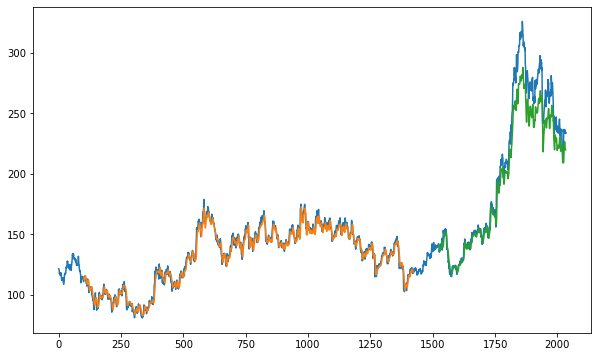

Green indicates the Predicted Data
Blue indicates the Complete Data
Orange indicates the Train Data


In [39]:
plt.figure(figsize=(10,6))

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicates the Complete Data")
print("Orange indicates the Train Data")